# Lab #4 - Logistic Regression [AMEO]
---

**Author - Aman Hussain**

**Reg. - 15BCE1077**

**Email - aman.hussain2015@vit.ac.in**
***

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

## Load Dataset

In [3]:
X = pd.read_csv('../Data/processed/X.csv')
y = pd.read_csv('../Data/processed/y_cat.csv')

## Data Preprocessing

In [4]:
X.head()

,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,...,Specialization_EC,Specialization_EL,Specialization_ME,Specialization_other,CollegeTier_1,CollegeTier_2,Degree_B.Tech/B.E.,Degree_M.Sc. (Tech.),Degree_M.Tech./M.E.,Degree_MCA
0,84.3,95.8,78.00,515,585,525,0.635979,445,0,0,...,0,0,0,0,0,1,1,0,0,0
1,85.4,85.0,70.06,695,610,780,0.960603,0,466,0,...,1,0,0,0,0,1,1,0,0,0
2,85.0,68.2,70.00,615,545,370,0.450877,395,0,0,...,0,0,0,0,0,1,1,0,0,0
3,85.6,83.6,74.64,635,585,625,0.974396,615,0,0,...,0,0,0,0,1,0,1,0,0,0
4,78.0,76.8,73.90,545,625,465,0.124502,0,233,0,...,1,0,0,0,0,1,1,0,0,0


In [5]:
# Taking the best features according to Decision Tree Algorithm
X = X[['Quant','ComputerProgramming']]
y = y['Salary']

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   test_size=0.25, random_state=0,
                                   stratify=y)

## Visualizing Learned Model

In [8]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    """
    Visualizes the learned model by plotting its decision boundary
    """
    
    from matplotlib.colors import ListedColormap
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
        
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
        
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

## Classification using Logistic Regression

### Training Logistic Regression Model from sklearn

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Visualizing the trained Logistic Regression Model

In [10]:
X_combined_std = np.vstack((X_train[:500], X_test[:500]))

In [11]:
y_combined = np.hstack((y_train[:500], y_test[:500]))

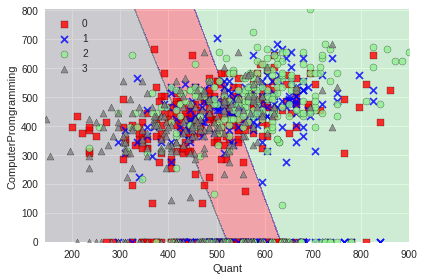

In [12]:
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=lr,
                      resolution=1)
plt.xlabel('Quant')
plt.ylabel('ComputerPromgramming')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('Figures/AMEO_logreg.png', dpi=300)
plt.show()

## Conclusion

**The salary of engineering graduates could not be classified using a standard logistic regression classifier.**